In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [3]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [4]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [5]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [6]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

In [7]:
from sklearn.linear_model import SGDClassifier

In [8]:
#Task 1 - Logistic Regression
features_names = ['f1', 'f2', 'f3']
logistic_sgd = SGDClassifier(loss='log')
logistic_sgd.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
logistic_sgd.coef_.T

array([[  1973.32317141],
       [-27157.52602101],
       [ 10773.66466332]])

In [10]:
feature_column = np.array([data.columns[:-1]]).T

In [11]:
feature_column

array([['f1'],
       ['f2'],
       ['f3']], dtype=object)

In [12]:
feature_importance=pd.DataFrame(np.hstack((feature_column, logistic_sgd.coef_.T)), columns=['feature', 'importance'])

In [13]:
feature_importance

,feature,importance
0,f1,1973.32
1,f2,-27157.5
2,f3,10773.7


### Logistic Regression
<strong>
Feature which a have strong correlation with Target variable that have higher coefficient value.
Note - Postive correlated will get postive coeffiecient,similarily negative will get negative value.
</strong>

In [14]:
#Task 1 - SVM - Hinge loss
features_names = ['f1', 'f2', 'f3']
SVM_sgd = SGDClassifier(loss='hinge')
SVM_sgd.fit(X,Y)
print(SVM_sgd.coef_.T)
feature_column = np.array([data.columns[:-1]]).T
feature_importance=pd.DataFrame(np.hstack((feature_column, SVM_sgd.coef_.T)), columns=['feature', 'importance'])

[[ 9393.66677559]
 [-5051.06617143]
 [10214.30328692]]


In [15]:
feature_importance

,feature,importance
0,f1,9393.67
1,f2,-5051.07
2,f3,10214.3


### SVM
<strong>
Feature which a have strong correlation with Target variable that have higher coefficient value.
Note - Postive correlated will get postive coeffiecient,similarily negative will get negative value.
</strong>

 Task2:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

In [71]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
scaler = StandardScaler()
scaler.fit(X)
scaled_feature = scaler.transform(X)
X_std = pd.DataFrame(scaled_feature,columns=['f1', 'f2', 'f3'])
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [78]:
X_std['Y']= Y

In [79]:
X_std.head()

,f1,f2,f3,Y
0,-0.423126,-1.555602,0.181651,1.0
1,-2.520394,-0.517290,-0.200648,1.0
2,-0.002139,0.300020,-1.567659,0.0
3,0.726209,1.365930,-1.338565,0.0
4,-1.599662,-0.892703,-1.072608,0.0


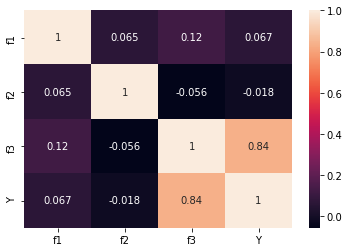

In [80]:
sns.heatmap(X_std.corr(),annot=True)

In [81]:
X_std.corr()

,f1,f2,f3,Y
f1,1.000000,0.065468,0.123589,0.067172
f2,0.065468,1.000000,-0.055561,-0.017944
f3,0.123589,-0.055561,1.000000,0.839060
Y,0.067172,-0.017944,0.839060,1.000000


In [72]:
#Logistic with Standarizsation
features_names = ['f1', 'f2', 'f3']
logistic_sgd = SGDClassifier(loss='log',random_state=123)
logistic_sgd.fit(X,Y)
logistic_sgd.coef_.T
feature_column = np.array([data.columns[:-1]]).T
feature_importance=pd.DataFrame(np.hstack((feature_column, logistic_sgd.coef_.T)), columns=['feature', 'importance'])

In [73]:
feature_importance

,feature,importance
0,f1,2748.14
1,f2,-18291.5
2,f3,10163.8


In [74]:
# SVM with Standarizsation
features_names = ['f1', 'f2', 'f3']
SVM_sgd = SGDClassifier(loss='hinge',random_state=123)
SVM_sgd.fit(X,Y)
SVM_sgd.coef_.T
feature_column = np.array([data.columns[:-1]]).T
feature_importance=pd.DataFrame(np.hstack((feature_column, SVM_sgd.coef_.T)), columns=['feature', 'importance'])

In [75]:
feature_importance

,feature,importance
0,f1,5348.75
1,f2,-8135.12
2,f3,10191.2


  <pre> 
    1.As part of Linear and SVM both doing same thing aspart of feature importances, highly correlated means high value.
    2. After standarizsation ,as part of this data
    3. As part of Linear and SVM both doing same thing aspart of feature importances, higher feature importances values are same quite same.
 </pre>